***
# Week 12 Higgs Boson Case Study
MSDS 7333 Quantifying the World  
*Allison Roderick, Jenna Ford, and Will Arnost* 
***

## Table of Contents

<a href='#Section_1'> 1. Introduction </a>  
<a href='#Section_2'> 2. Question </a>  
<a href='#Section_3'> 3. Methods </a>  
<a href='#Section_3_a'> &nbsp;&nbsp;&nbsp; a. Dataset </a>  
<a href='#Section_3_b'> &nbsp;&nbsp;&nbsp; b. Neural Network Structure </a>  
<a href='#Section_3_c'> &nbsp;&nbsp;&nbsp; c. Other Considerations </a>  
<a href='#Section_4'> 4. Modeling </a>  
<a href='#Section_5'> 5. Results </a>  
<a href='#Section_6'> 6. Conclusion </a>  
<a href='#Section_7'> 7. References </a>  
<a href='#Section_8'> 8. Code </a>  

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

<a id = 'Section_1'></a>

## 1. Introduction

This week's case study involves replicating results produces in the paper "Searching for Exotic Particles in High-Energy Physics with Deep Learning" by Baldi, Sadowski, and Whiteson [1]. The 2014 paper looks to distinguish between particle collisions that produce exotic particle and those that do not. The authors investigate the use of deep neural networks to improve accuracy over other methods. 

We will attempt to replicate that paper's neural network architecture and performance. The packages used in the paper are outdated, so we will be using tensorflow to build our network. We hope to get as close to their AUC of 0.88 as possible.

<a id = 'Section_2'></a>

## 2. Question

Given the following paper: https://arxiv.org/pdf/1402.4735.pdf

Build a replica Neural Network with the paper’s architecture using Tensorflow. If possible begin to train on the data located here: https://archive.ics.uci.edu/ml/datasets/HIGGS. How close can you get to the original results?
To facilitate quicker training you may increase the batch size temporarily (this has a small impact on final result, but can speed you calculations significantly). You do not need to train a final result using the paper’s parameters, only the code for your model is required in your final submission.

Include in your report:
Based on the class notes and discussion suggest improvements to the procedure. What are standard practices now versus when this paper was written? What kind of improvements do they provide?
How would you quantify if your result duplicated the paper’s?


<a id = 'Section_3'></a>

## 3. Methods

This section gives an overview of what we know about the data and how we prepared the dataset for modeling.

<a id = 'Section_3_a'></a>

### 3a. Dataset

The dataset contains 11 million observations and 29 columns. The target column indicates if the collision produced exotic particles. The remaining 28 columns are numeric. There are no missing values in the data.

To replicate the methods of the paper, we will use a sample of 2.6M records for model training and 100K records for validation. We do not know exactly which records they used, this will be one difference between our results and theirs.

<a id = 'Section_3_b'></a>

### 3b. Neural Network Stucture

<a id = 'Section_3_c'></a>

To replicate the study, we want to create a network with the following structure:
- 5 densly connected layers
 - 4 layers with 300 hidden units and tanh activation functions
 - 1 output layer with a linear activation function
- learning rate of 0.05
- weight decay coefficient of 1 × 10−5
 - The learning rate decayed by a factor of 1.0000002 every batch update until it reached a minimum of 10−6
- We used a normal distribution with mean zero to initialize the weights. The standard deviation was set to 0.1 for the first layer, 0.001 for the output layer, and 0.05 for layers 2-4.
- Mini-Batch sizes of 100
- <!>A momentum term increased linearly over the first 200 epochs from 0.9 to 0.99, at which point it remained constant
- <!>Training ended when the momentum had reached its maximum value and the minimum error on the validation set (500,000 examples) had not decreased by more than a factor of 0.00001 over 10 epochs.his early stopping prevented overfitting and resulted in each neural network being trained for 200-1000 epochs
- <!> Autoencoder pretraining was performed by training a stack of single-hidden-layer autoencoder networks as in [9], then fine-tuning the full network using the class labels. Each autoencoder in the stack used tanh hidden units and linear outputs, and was trained with the same initialization scheme, learning algorithm, and stopping parameters as in the fine-tuning stage. When training with dropout, we increased the learning rate decay factor to 1.0000003, and only ended training when the momentum had reached its maximum value and the error on the validation set had not decreased for 40 epochs.
- <!> Input features were standardized over the entire train/test set with mean zero and standard deviation one, except for those features with values strictly greater than zero – these we scaled so that the mean value was one.

### 3c. Other Considerations

Tensorflow is much newer than the Theano library used in the original paper. Methods for training neural networks have also changed since the paper was written in 2014. We are not able to replicate all aspects of the original network and explain those instances here.

We mentioned earlier that from the 11M records in the dataset, we are not certain which ones were used by the paper's authors. If all columns in our sample have a distribution similar to the sample the authors used, we would expect the difference to be small. If they are not, the difference will be larger.

<!> The paper indicates the output layer used a linear activation function. Tensorflow does not recognize this as a valid option for classification problems and throws an error <!error>. 

We did not use pretraining with an autoencoder. 

<a id = 'Section_4'></a>

## 4. Modeling

<a id = 'Section_5'></a>

## 5. Results

<a id = 'Section_6'></a>

## 6. Conclusion

<a id = 'Section_7'></a>

## 7. References

1. https://arxiv.org/pdf/1402.4735.pdf Searching for Exotic Particles in High-Energy Physics with Deep Learning by Baldi, Sadowski, and Whiteson

<a id = 'Section_8'></a>

## 8. Code

### Load Packages

In [1]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from sklearn import datasets
import sklearn
import pandas as pd
import numpy as np
print(tf.__version__)

2.1.0


### Unzip the File and Read in the Data

In [2]:
import gzip
import shutil
with gzip.open('C:\\Users\\allro\\JupyterNotebook\\QTW\\Data\\HIGGS.csv.gz', 'rb') as f_in:
    with open('C:\\Users\\allro\\JupyterNotebook\\QTW\\Data\\HIGGS.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\allro\\JupyterNotebook\\QTW\\Data\\HIGGS.csv.gz'

In [3]:
# https://archive.ics.uci.edu/ml/datasets/HIGGS#
#df = pd.read_csv("./Data/HIGGS.csv", header=None)
df = pd.read_csv("../../HIGGS.csv", header=None)

In [4]:
# add column names
df.columns =['target', 'lepton_ph', 'lepton_eta', 'lepton_phi','missing_energy_magnitude','missing_energy_phi',
             'jet_1_pt','jet_1_eta','jet_1_phi','jet_1_btag','jet_2_pt','jet_2_eta','jet_2_phi','jet_2_btag',
             'jet_3_pt','jet_3_eta','jet_3_phi','jet_3_btag','jet_4_pt','jet_4_eta','jet_4_phi','jet_4_btag',
             'm_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb'] 

In [5]:
# Print out the data types
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000000 entries, 0 to 10999999
Data columns (total 29 columns):
target                      float64
lepton_ph                   float64
lepton_eta                  float64
lepton_phi                  float64
missing_energy_magnitude    float64
missing_energy_phi          float64
jet_1_pt                    float64
jet_1_eta                   float64
jet_1_phi                   float64
jet_1_btag                  float64
jet_2_pt                    float64
jet_2_eta                   float64
jet_2_phi                   float64
jet_2_btag                  float64
jet_3_pt                    float64
jet_3_eta                   float64
jet_3_phi                   float64
jet_3_btag                  float64
jet_4_pt                    float64
jet_4_eta                   float64
jet_4_phi                   float64
jet_4_btag                  float64
m_jj                        float64
m_jjj                       float64
m_lv                 

In [6]:
# view the data
df.head()

,target,lepton_ph,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


### Sample the Data

In [7]:
# subsample the data, 2.6million records for train and 100k for test
#train = df.sample(n=2700000, random_state=123)
train = df.loc[1:2600000,:]

In [10]:
test = df.loc[10900000:,:]

In [11]:
test.describe()

,target,lepton_ph,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,jet_2_eta,jet_2_phi,jet_2_btag,jet_3_pt,jet_3_eta,jet_3_phi,jet_3_btag,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.527920,0.990813,0.001182,0.001023,1.001417,-0.000091,0.991479,0.000904,-0.003438,1.000691,0.992980,0.000820,-0.002011,0.998564,0.992009,0.000257,0.002184,1.001287,0.984663,-0.001472,-0.002528,0.999623,1.030947,1.022480,1.049953,1.008384,0.972178,1.031611,0.958529
std,0.499222,0.565247,1.008622,1.003933,0.602900,1.004503,0.477187,1.008778,1.007950,1.027084,0.500264,1.008215,1.007988,1.048803,0.489483,1.009223,1.005359,1.194155,0.505068,1.008343,1.006153,1.400944,0.667706,0.375855,0.161874,0.395813,0.527358,0.364740,0.312684
min,0.000000,0.274697,-2.434002,-1.742508,0.002749,-1.743927,0.147396,-2.968735,-1.741237,0.000000,0.189107,-2.913090,-1.742372,0.000000,0.263608,-2.728753,-1.742069,0.000000,0.365354,-2.497265,-1.742691,0.000000,0.117654,0.323551,0.154012,0.187605,0.066506,0.369259,0.398860
25%,0.000000,0.590204,-0.740270,-0.864718,0.578815,-0.871730,0.677619,-0.686255,-0.875857,0.000000,0.656839,-0.694715,-0.875173,0.000000,0.650150,-0.698898,-0.870025,0.000000,0.615820,-0.716689,-0.875363,0.000000,0.789978,0.845503,0.985733,0.768924,0.671727,0.819015,0.769170
50%,1.000000,0.852273,0.003842,-0.003570,0.892142,0.004286,0.894132,0.004926,-0.007703,1.086538,0.890264,0.001032,0.003228,0.000000,0.895844,-0.001648,0.007117,0.000000,0.867503,0.003703,-0.006646,0.000000,0.894538,0.949578,0.989797,0.914493,0.872124,0.946225,0.870942
75%,1.000000,1.237141,0.738214,0.866555,1.297944,0.864816,1.172114,0.686204,0.868313,2.173076,1.202504,0.694592,0.872647,2.214872,1.223203,0.699244,0.870840,2.548224,1.218740,0.709938,0.867721,3.101961,1.024222,1.081825,1.021190,1.138317,1.136823,1.139043,1.057087
max,1.000000,7.184022,2.434868,1.743236,8.273911,1.743257,8.577184,2.967694,1.741454,2.173076,7.938468,2.913210,1.743175,2.214872,9.598233,2.730009,1.742884,2.548224,7.509841,2.498009,1.743372,3.101961,23.905035,12.174695,4.156842,7.551758,9.266160,6.802347,5.974743


### Scale the Variables

In [12]:
# split out target and explanatory variables
y = train['target']
pre_X = train.loc[:, df.columns != 'target']

y1 = test['target']
pre_X1 = test.loc[:, df.columns != 'target']

In [17]:
# scale the data
from sklearn.preprocessing import StandardScaler

#NOT strictly greater than 0 columns:
not_greater_than_0 = ['lepton_eta','lepton_phi','missing_energy_phi','jet_1_eta','jet_1_phi','jet_1_btag',
                      'jet_2_eta','jet_2_phi','jet_2_btag','jet_3_eta','jet_3_phi','jet_3_btag','jet_4_eta',
                      'jet_4_phi','jet_4_btag']

# strictly greater than 0 columns:
greater_than_0 = ['lepton_ph','missing_energy_magnitude','jet_1_pt','jet_2_pt','jet_4_pt','jet_3_pt','m_jj','m_jjj','m_lv',
                  'm_jlv','m_bb','m_wbb','m_wwbb']


# these columns scale where mean=0 and stdev=1
to_scale1 = pre_X[not_greater_than_0]
scaler = StandardScaler()
scaled_train1 = scaler.fit_transform(to_scale1)
scaled_train_df1 = pd.DataFrame(scaled_train1, columns=not_greater_than_0)

# these columns scale where mean=1 and stdev=1
to_scale2 = pre_X[greater_than_0]
scaler = StandardScaler()
scaled_train2 = scaler.fit_transform(to_scale2)
scaled_train_df2 = pd.DataFrame(scaled_train2 + 1, columns=greater_than_0)
scaled_train_df2.describe()


# these columns scale where mean=0 and stdev=1
to_scale11 = pre_X1[not_greater_than_0]
scaler = StandardScaler()
scaled_train11 = scaler.fit_transform(to_scale11)
scaled_train_df11 = pd.DataFrame(scaled_train11, columns=not_greater_than_0)

# these columns scale where mean=1 and stdev=1
to_scale21 = pre_X1[greater_than_0]
scaler = StandardScaler()
scaled_train21 = scaler.fit_transform(to_scale21)
scaled_train_df21 = pd.DataFrame(scaled_train21 + 1, columns=greater_than_0)
scaled_train_df21.describe()

,lepton_ph,missing_energy_magnitude,jet_1_pt,jet_2_pt,jet_4_pt,jet_3_pt,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005
min,-0.266914,-0.656449,-0.768883,-0.606904,-0.226194,-0.488111,-0.367815,-0.859579,-4.534849,-1.073660,-0.717385,-0.815965,-0.789896
25%,0.291265,0.299047,0.342265,0.328070,0.269714,0.301588,0.639107,0.529133,0.603268,0.395017,0.430269,0.417127,0.394403
50%,0.754904,0.818750,0.795997,0.794675,0.768031,0.803537,0.795704,0.806036,0.628376,0.762789,0.810272,0.765897,0.719884
75%,1.435791,1.491836,1.378543,1.418830,1.463459,1.472324,0.989928,1.157894,0.822313,1.328271,1.312210,1.294544,1.315203
max,11.956689,13.062579,16.896800,14.883706,13.919465,18.582360,35.257918,30.671740,20.193411,17.531545,16.727507,16.821565,17.042534


In [18]:
# combine the separate scaled dataframes
x_train = pd.concat([scaled_train_df1, scaled_train_df2], axis=1, sort=False)
y_train = y

x_test = pd.concat([scaled_train_df11, scaled_train_df21], axis=1, sort=False)
y_test = y1

In [19]:
# make sure all columns are numeric
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

### Neural Network Model

In [20]:
from tensorflow.keras import initializers

model = tf.keras.Sequential()
# input
model.add(tf.keras.Input(shape=(28,)))
# hidden
model.add(layers.Dense(300,
                       activation='tanh', 
                       kernel_initializer=initializers.RandomNormal(stddev=0.1)))  
model.add(layers.Dense(300,
                       activation='tanh', 
                       kernel_initializer=initializers.RandomNormal(stddev=0.05)))
model.add(layers.Dense(300,
                       activation='tanh', 
                       kernel_initializer=initializers.RandomNormal(stddev=0.05)))
model.add(layers.Dense(300,
                       activation='tanh', 
                       kernel_initializer=initializers.RandomNormal(stddev=0.05)))
model.add(layers.Dense(1,
                       activation='sigmoid',
                       kernel_initializer=initializers.RandomNormal(stddev=0.001)))  


In [21]:
#change learning rate and add stopping criteria
from tensorflow.keras import optimizers

# the learning rate decayed by a factor of 1.0000002 every batch update until it reached a minimum of 10−6
def scheduler(epoch):
    initial_lrate = 0.05
    k = 1.0000002
    lrate = initial_lrate * tf.math.exp(-k*epoch)
    return max(lrate, 10e-6)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#set early stopping criteria
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.00001 , patience=10)

mom = tf.Variable(0.9)
opt = tf.optimizers.SGD(momentum=mom, nesterov=True)
print(opt.get_config())

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['AUC'])

{'name': 'SGD', 'learning_rate': 0.01, 'decay': 0.0, 'momentum': 0.9, 'nesterov': True}


In [23]:
# train the model and evaluate against the test datset
training_history = model.fit(x_train, y_train, epochs=250, validation_data=(x_test,y_test), batch_size=100,
          callbacks=[lr_callback,es_callback])

Train on 2600000 samples, validate on 100000 samples
Epoch 1/250
2600000/2600000 [==============================] - 190s 73us/sample - loss: 0.5395 - AUC: 0.8000 - val_loss: 0.5174 - val_AUC: 0.8213
Epoch 2/250
2600000/2600000 [==============================] - 191s 74us/sample - loss: 0.5005 - AUC: 0.8323 - val_loss: 0.5010 - val_AUC: 0.8341
Epoch 3/250
2600000/2600000 [==============================] - 185s 71us/sample - loss: 0.4890 - AUC: 0.8408 - val_loss: 0.4906 - val_AUC: 0.8401
Epoch 4/250
2600000/2600000 [==============================] - 207s 80us/sample - loss: 0.4835 - AUC: 0.8448 - val_loss: 0.4860 - val_AUC: 0.8433
Epoch 5/250
2600000/2600000 [==============================] - 182s 70us/sample - loss: 0.4809 - AUC: 0.8467 - val_loss: 0.4844 - val_AUC: 0.8443
Epoch 6/250
2600000/2600000 [==============================] - 184s 71us/sample - loss: 0.4798 - AUC: 0.8475 - val_loss: 0.4841 - val_AUC: 0.8445
Epoch 7/250
2600000/2600000 [==============================] - 190s 73u

2600000/2600000 [==============================] - 161s 62us/sample - loss: 0.4787 - AUC: 0.8483 - val_loss: 0.4837 - val_AUC: 0.8449
Epoch 57/250
2600000/2600000 [==============================] - 164s 63us/sample - loss: 0.4787 - AUC: 0.8483 - val_loss: 0.4836 - val_AUC: 0.8449
Epoch 58/250
2600000/2600000 [==============================] - 165s 63us/sample - loss: 0.4787 - AUC: 0.8483 - val_loss: 0.4836 - val_AUC: 0.8449
Epoch 59/250
2600000/2600000 [==============================] - 162s 62us/sample - loss: 0.4787 - AUC: 0.8483 - val_loss: 0.4836 - val_AUC: 0.8449
Epoch 60/250
2600000/2600000 [==============================] - 168s 65us/sample - loss: 0.4787 - AUC: 0.8483 - val_loss: 0.4836 - val_AUC: 0.8449
Epoch 61/250
2600000/2600000 [==============================] - 162s 62us/sample - loss: 0.4786 - AUC: 0.8483 - val_loss: 0.4836 - val_AUC: 0.8449
Epoch 62/250
2600000/2600000 [==============================] - 167s 64us/sample - loss: 0.4786 - AUC: 0.8483 - val_loss: 0.4836 - 

Epoch 112/250
2600000/2600000 [==============================] - 172s 66us/sample - loss: 0.4783 - AUC: 0.8486 - val_loss: 0.4834 - val_AUC: 0.8451
Epoch 113/250
2600000/2600000 [==============================] - 172s 66us/sample - loss: 0.4783 - AUC: 0.8486 - val_loss: 0.4833 - val_AUC: 0.8451
Epoch 114/250
2600000/2600000 [==============================] - 163s 63us/sample - loss: 0.4783 - AUC: 0.8486 - val_loss: 0.4833 - val_AUC: 0.8451
Epoch 115/250
2600000/2600000 [==============================] - 163s 63us/sample - loss: 0.4783 - AUC: 0.8486 - val_loss: 0.4833 - val_AUC: 0.8451
Epoch 116/250
2600000/2600000 [==============================] - 162s 62us/sample - loss: 0.4783 - AUC: 0.8486 - val_loss: 0.4833 - val_AUC: 0.8451
Epoch 117/250
2600000/2600000 [==============================] - 164s 63us/sample - loss: 0.4783 - AUC: 0.8486 - val_loss: 0.4833 - val_AUC: 0.8452
Epoch 118/250
2600000/2600000 [==============================] - 163s 63us/sample - loss: 0.4782 - AUC: 0.8486 -

2600000/2600000 [==============================] - 164s 63us/sample - loss: 0.4779 - AUC: 0.8488 - val_loss: 0.4831 - val_AUC: 0.8453
Epoch 168/250
2600000/2600000 [==============================] - 162s 62us/sample - loss: 0.4779 - AUC: 0.8488 - val_loss: 0.4830 - val_AUC: 0.8453
Epoch 169/250
2600000/2600000 [==============================] - 168s 65us/sample - loss: 0.4779 - AUC: 0.8488 - val_loss: 0.4831 - val_AUC: 0.8453
Epoch 170/250
2600000/2600000 [==============================] - 161s 62us/sample - loss: 0.4779 - AUC: 0.8488 - val_loss: 0.4830 - val_AUC: 0.8453
Epoch 171/250
2600000/2600000 [==============================] - 164s 63us/sample - loss: 0.4779 - AUC: 0.8489 - val_loss: 0.4830 - val_AUC: 0.8453
Epoch 172/250
2600000/2600000 [==============================] - 174s 67us/sample - loss: 0.4779 - AUC: 0.8489 - val_loss: 0.4830 - val_AUC: 0.8453
Epoch 173/250
2600000/2600000 [==============================] - 162s 62us/sample - loss: 0.4779 - AUC: 0.8489 - val_loss: 0.4

2600000/2600000 [==============================] - 166s 64us/sample - loss: 0.4775 - AUC: 0.8491 - val_loss: 0.4828 - val_AUC: 0.8455
Epoch 223/250
2600000/2600000 [==============================] - 163s 63us/sample - loss: 0.4775 - AUC: 0.8491 - val_loss: 0.4828 - val_AUC: 0.8455
Epoch 224/250
2600000/2600000 [==============================] - 162s 62us/sample - loss: 0.4775 - AUC: 0.8491 - val_loss: 0.4828 - val_AUC: 0.8455
Epoch 225/250
2600000/2600000 [==============================] - 162s 62us/sample - loss: 0.4775 - AUC: 0.8491 - val_loss: 0.4828 - val_AUC: 0.8455
Epoch 226/250
2600000/2600000 [==============================] - 162s 62us/sample - loss: 0.4775 - AUC: 0.8491 - val_loss: 0.4828 - val_AUC: 0.8455
Epoch 227/250
2600000/2600000 [==============================] - 162s 62us/sample - loss: 0.4775 - AUC: 0.8491 - val_loss: 0.4828 - val_AUC: 0.8455
Epoch 228/250
2600000/2600000 [==============================] - 162s 62us/sample - loss: 0.4775 - AUC: 0.8491 - val_loss: 0.4

### Plots for AUC and Loss

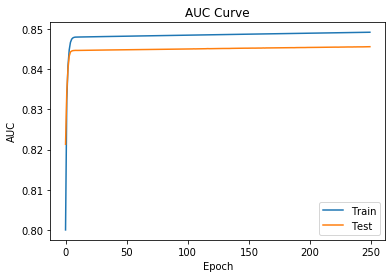

In [25]:
import matplotlib.pyplot as plt

train_loss = model.history.history['AUC']
val_loss = model.history.history['val_AUC']
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.legend(title='')
plt.title('AUC Curve')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.show()

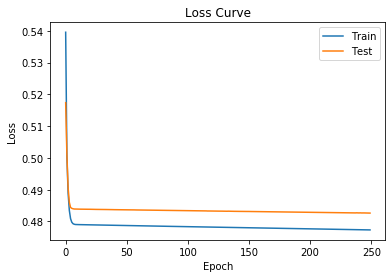

In [26]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.legend(title='')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()